<a href="https://colab.research.google.com/github/Willian-Baggio/India-Agriculture-Data-Analytics/blob/main/India_Agriculture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [50]:
# importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

## **Importando o dataset**

In [51]:
df = pd.read_csv('/content/drive/MyDrive/projetos/India Agriculture Crop Production.csv')
df.head()

,State,District,Crop,Year,Season,Area,Area Units,Production,Production Units,Yield
0,Andaman and Nicobar Islands,NICOBARS,Arecanut,2001-02,Kharif,1254.000,Hectare,2061.000,Tonnes,1.644
1,Andaman and Nicobar Islands,NICOBARS,Arecanut,2002-03,Whole Year,1258.000,Hectare,2083.000,Tonnes,1.656
2,Andaman and Nicobar Islands,NICOBARS,Arecanut,2003-04,Whole Year,1261.000,Hectare,1525.000,Tonnes,1.209
3,Andaman and Nicobar Islands,NORTH AND MIDDLE ANDAMAN,Arecanut,2001-02,Kharif,3100.000,Hectare,5239.000,Tonnes,1.690
4,Andaman and Nicobar Islands,SOUTH ANDAMANS,Arecanut,2002-03,Whole Year,3105.000,Hectare,5267.000,Tonnes,1.696


*   State - Estado indiano
*   District - Distrito do estado indiano específico
*   Crop - Safra para a qual a produção é registrada
*   Year - Ano de registro específico
*   Season - Temporada de agricultura
*   Production - Contagem de produção example
*   Production Units - Toneladas
*   Yeild - Produção colhida por unidade de área colhida para produtos agrícolas








In [52]:
df.shape

(345407, 10)

In [53]:
df.dtypes

State                object
District             object
Crop                 object
Year                 object
Season               object
Area                float64
Area Units           object
Production          float64
Production Units     object
Yield               float64
dtype: object

In [54]:
df.isnull().sum()

State                  0
District               0
Crop                  32
Year                   0
Season                 1
Area                  33
Area Units             0
Production          4993
Production Units       0
Yield                 33
dtype: int64

In [55]:
df.dropna(inplace = True)

In [56]:
df.isnull().sum()

State               0
District            0
Crop                0
Year                0
Season              0
Area                0
Area Units          0
Production          0
Production Units    0
Yield               0
dtype: int64

In [57]:
df.columns

Index(['State', 'District', 'Crop', 'Year', 'Season', 'Area', 'Area Units',
       'Production', 'Production Units', 'Yield'],
      dtype='object')

In [58]:
df.duplicated().sum()

0

In [59]:
df.describe()

,Area,Production,Yield
count,340414.000,340414.000,340414.000
mean,11825.346,958371.149,80.565
std,46124.836,21529855.088,923.232
min,0.008,0.000,0.000
25%,80.000,87.000,0.568
50%,563.000,717.000,1.025
75%,4257.000,7176.000,2.500
max,8580100.000,1597800000.000,43958.333


In [60]:
pd.set_option('float_format', '{:.3f}'.format)

In [61]:
df.describe()

,Area,Production,Yield
count,340414.000,340414.000,340414.000
mean,11825.346,958371.149,80.565
std,46124.836,21529855.088,923.232
min,0.008,0.000,0.000
25%,80.000,87.000,0.568
50%,563.000,717.000,1.025
75%,4257.000,7176.000,2.500
max,8580100.000,1597800000.000,43958.333


In [62]:
df['Season'].value_counts()

Kharif        136165
Rabi           99805
Whole Year     67265
Summer         21974
Winter          8238
Autumn          6967
Name: Season, dtype: int64

In [63]:
df['Area Units'].value_counts()

Hectare    340414
Name: Area Units, dtype: int64

In [64]:
df['Production Units'].value_counts()

Tonnes    326999
Bales      10524
Nuts        2891
Name: Production Units, dtype: int64

## **Entendendo os Dados**

Precisamos ajustar as nossas unidade de medidas, note que temos a coluna Production Units referente as unidades produzidas, precisamos pradonizar essa unidade para uma unidade específica para assim realizar a medição adequada

In [65]:
unidades = list(df['Production Units'].unique())
print(unidades)

['Tonnes', 'Nuts', 'Bales']


['Tonnes', 'Nuts', 'Bales']

1.   Tonnes: Toneladas
2.   Nuts: Noz
3.   Bales: Fardos

Para padronizar iremos converter todos os dados para toneladas


In [66]:
def unidades_padronizadas(df):

    if df["Production Units"] == "Nuts":
        new_production = df["Production"] / 50
        return new_production

    elif df["Production Units"] == "Tonnes":
        return df["Production"]

    else:
        new_production = df["Production"] / 4.59
        return new_production


df["Standardized unit"] = df.apply(unidades_padronizadas, axis = 1)
df.sample(10)

,State,District,Crop,Year,Season,Area,Area Units,Production,Production Units,Yield,Standardized unit
257061,Odisha,KENDRAPARA,Horse-gram,2017-18,Winter,32.000,Hectare,13.100,Tonnes,0.409,13.100
117502,Rajasthan,AJMER,Onion,2009-10,Whole Year,538.000,Hectare,813.000,Tonnes,1.511,813.000
282003,Chhattisgarh,BALODA BAZAR,Safflower,2019-20,Rabi,6.000,Hectare,2.000,Tonnes,0.333,2.000
229304,Assam,DARRANG,Potato,2017-18,Whole Year,5265.000,Hectare,41446.000,Tonnes,7.872,41446.000
34377,Uttar Pradesh,KUSHI NAGAR,Arhar/Tur,2003-04,Kharif,1065.000,Hectare,552.000,Tonnes,0.518,552.000
341742,Uttar Pradesh,KANPUR NAGAR,Sunflower,1997-98,Rabi,3698.000,Hectare,5600.000,Tonnes,1.514,5600.000
64032,Madhya Pradesh,VIDISHA,Rice,2006-07,Kharif,571.000,Hectare,446.000,Tonnes,0.781,446.000
158929,Meghalaya,WEST GARO HILLS,Jute,2010-11,Kharif,3379.000,Hectare,31764.000,Bales,9.400,6920.261
177487,Andhra Pradesh,SRIKAKULAM,Maize,2014-15,Rabi,5771.000,Hectare,46324.000,Tonnes,8.027,46324.000
112340,Meghalaya,SOUTH GARO HILLS,Sesamum,2007-08,Kharif,155.000,Hectare,78.000,Tonnes,0.503,78.000


## **Visualizando dos dados**

### **Qual estado e distrito possui a maior produção agrícola?**

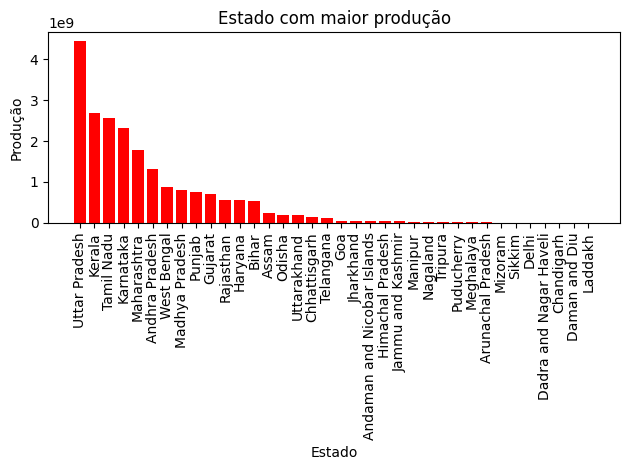

In [67]:
total_producao_estado = df.groupby('State')['Standardized unit'].sum()
total_producao_estado = total_producao_estado.sort_values(ascending=False)

# plot
plt.bar(total_producao_estado.index, total_producao_estado.values, color='red')
plt.xticks(rotation=90)
plt.xlabel('Estado')
plt.ylabel('Produção')
plt.title('Estado com maior produção')
plt.tight_layout()

plt.show()

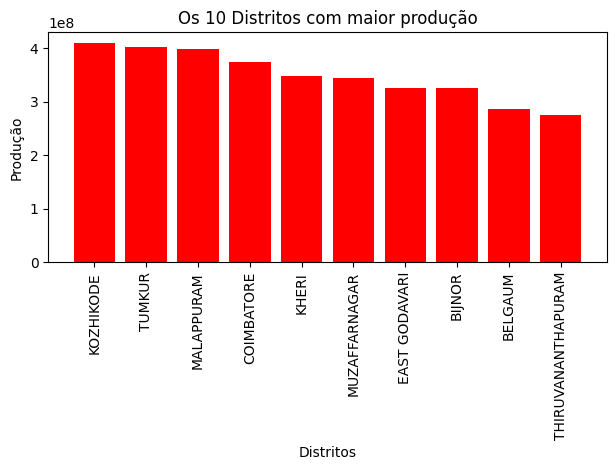

In [68]:
total_producao_distrito = df.groupby('District')['Standardized unit'].sum()
total_producao_distrito  = total_producao_distrito .sort_values(ascending=False)

top_10 = total_producao_distrito.head(10)

# plot
plt.bar(top_10.index, top_10.values, color='red')
plt.xticks(rotation=90)
plt.xlabel('Distritos')
plt.ylabel('Produção')
plt.title('Os 10 Distritos com maior produção')
plt.tight_layout()

plt.show()

### **Média de Produção**

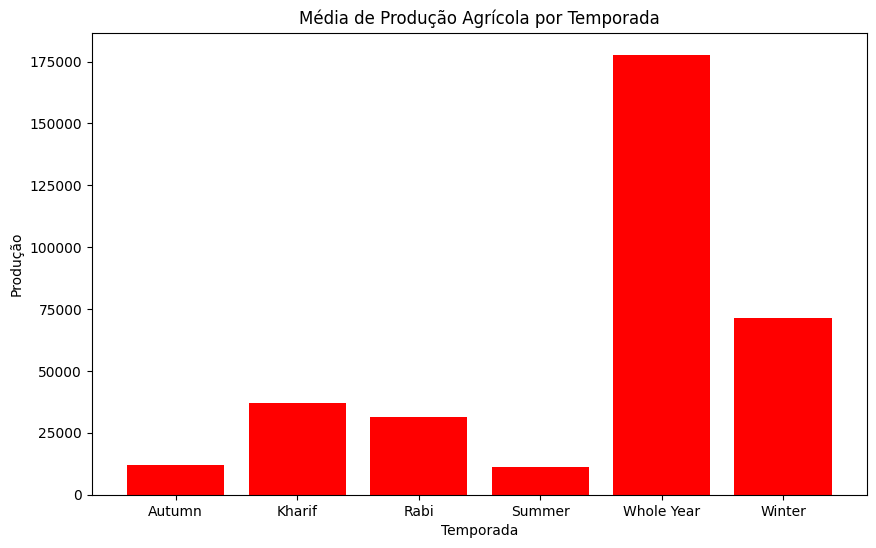

In [69]:
producao_por_safra = df.groupby('Season')['Standardized unit'].mean().reset_index()

# plot
plt.figure(figsize=(10, 6))
plt.bar(producao_por_safra['Season'], producao_por_safra['Standardized unit'], color='red')
plt.xlabel('Temporada')
plt.ylabel('Produção')
plt.title('Média de Produção Agrícola por Temporada')
plt.show()

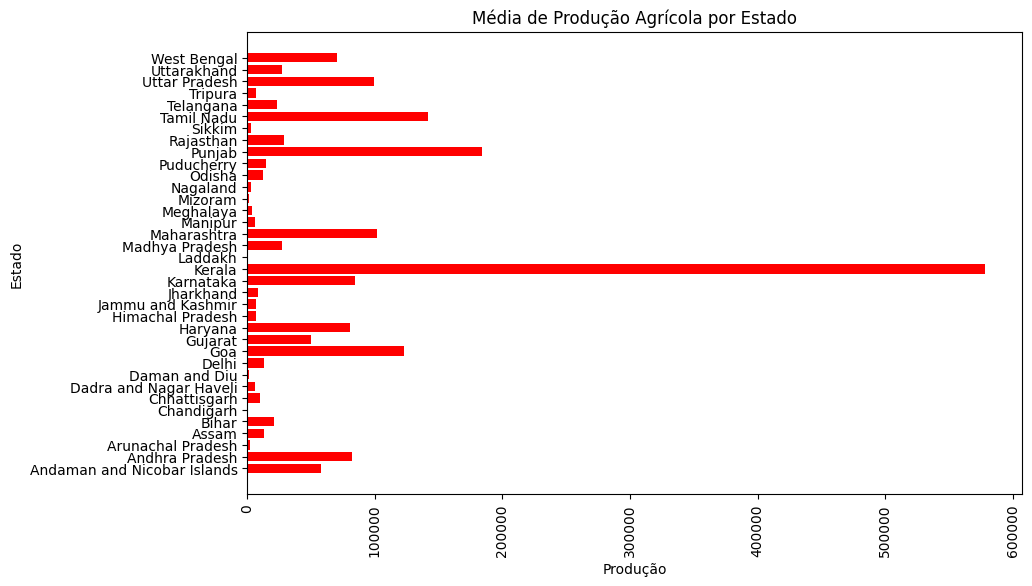

In [70]:
media_producao_estado = df.groupby('State')['Standardized unit'].mean().reset_index()

# plot
plt.figure(figsize=(10, 6))
plt.barh(media_producao_estado['State'], media_producao_estado['Standardized unit'], color='red')
plt.xlabel('Produção')
plt.ylabel('Estado')
plt.title('Média de Produção Agrícola por Estado')
plt.xticks(rotation=90)
plt.show()

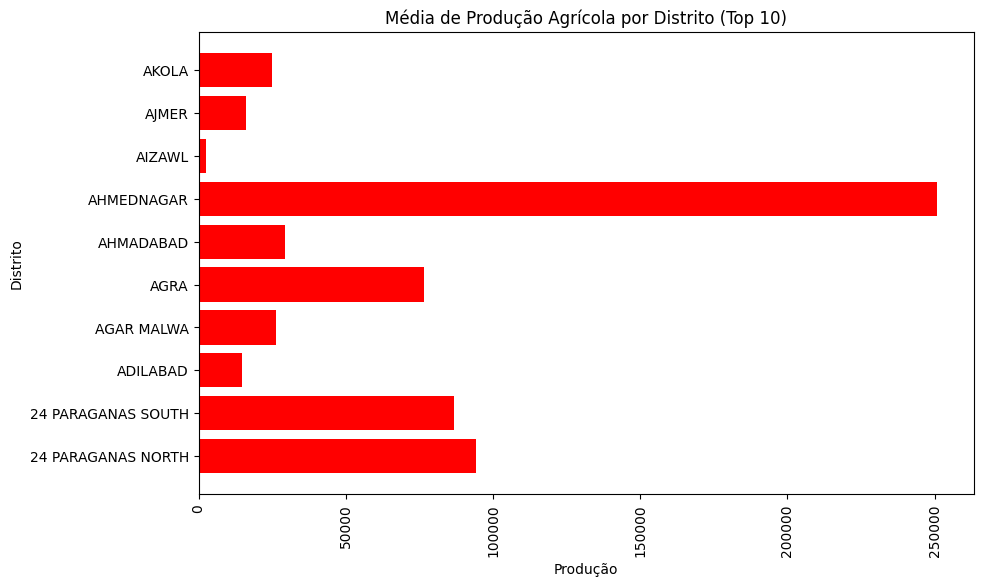

In [71]:
media_producao_distrito = df.groupby('District')['Standardized unit'].mean().reset_index()
top_10_distritos = media_producao_distrito.head(10)

# plot
plt.figure(figsize=(10, 6))
plt.barh(top_10_distritos['District'], top_10_distritos['Standardized unit'], color='red')
plt.xlabel('Produção')
plt.ylabel('Distrito')
plt.title('Média de Produção Agrícola por Distrito (Top 10)')
plt.xticks(rotation=90)
plt.show()

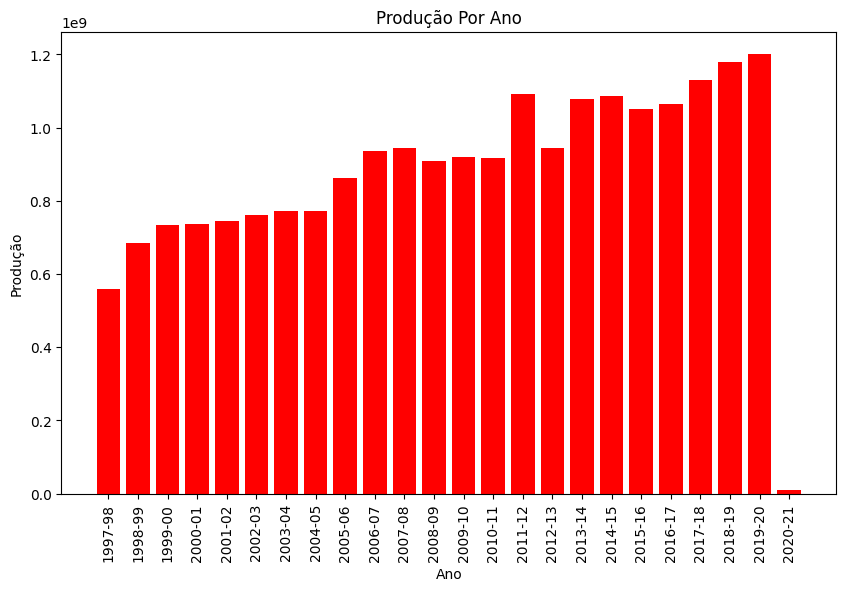

In [72]:
ano_maior_producao = df.groupby('Year')['Standardized unit'].sum().reset_index()

# plot
plt.figure(figsize=(10, 6))
plt.bar(ano_maior_producao['Year'], ano_maior_producao['Standardized unit'], color='red')
plt.xlabel('Ano')
plt.ylabel('Produção')
plt.title('Produção Por Ano')
plt.xticks(rotation=90)
plt.show()

### **Safra**

In [73]:
df['Crop'].value_counts().head(5)

Rice                 21573
Maize                20329
Moong(Green Gram)    14813
Urad                 14389
Sesamum              12744
Name: Crop, dtype: int64

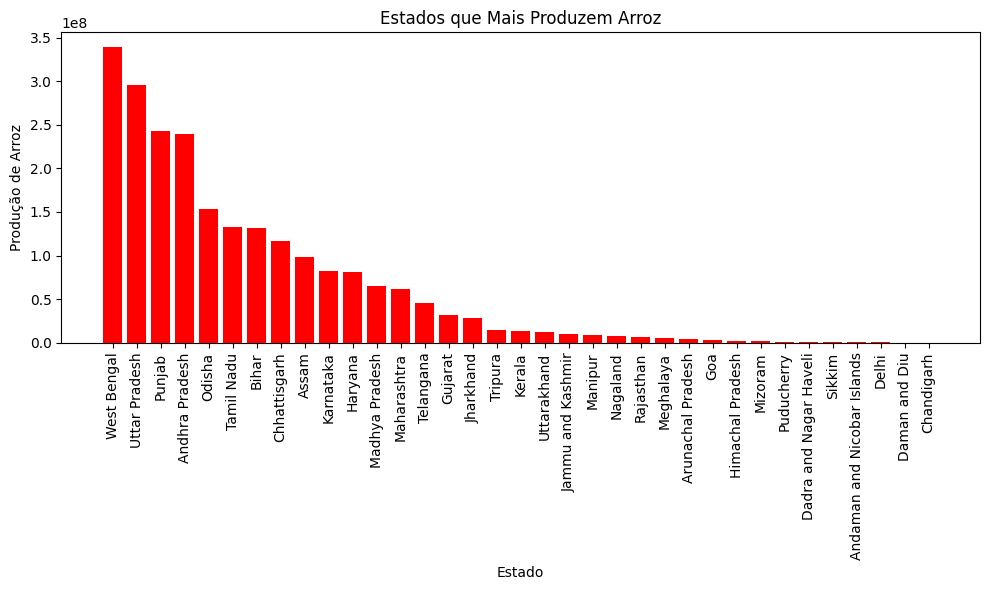

In [74]:
df_arroz = df[df['Crop'] == 'Rice']

# calcula a produção total de arroz por estado
producao_por_estado = df_arroz.groupby('State')['Standardized unit'].sum()

# ordena os estados com base na produção de arroz (do maior para o menor)
estados_mais_produtivos = producao_por_estado.sort_values(ascending=False)

# plot
plt.figure(figsize=(10, 6))
plt.bar(estados_mais_produtivos.index, estados_mais_produtivos.values, color='red')
plt.xlabel('Estado')
plt.ylabel('Produção de Arroz')
plt.title('Estados que Mais Produzem Arroz')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()



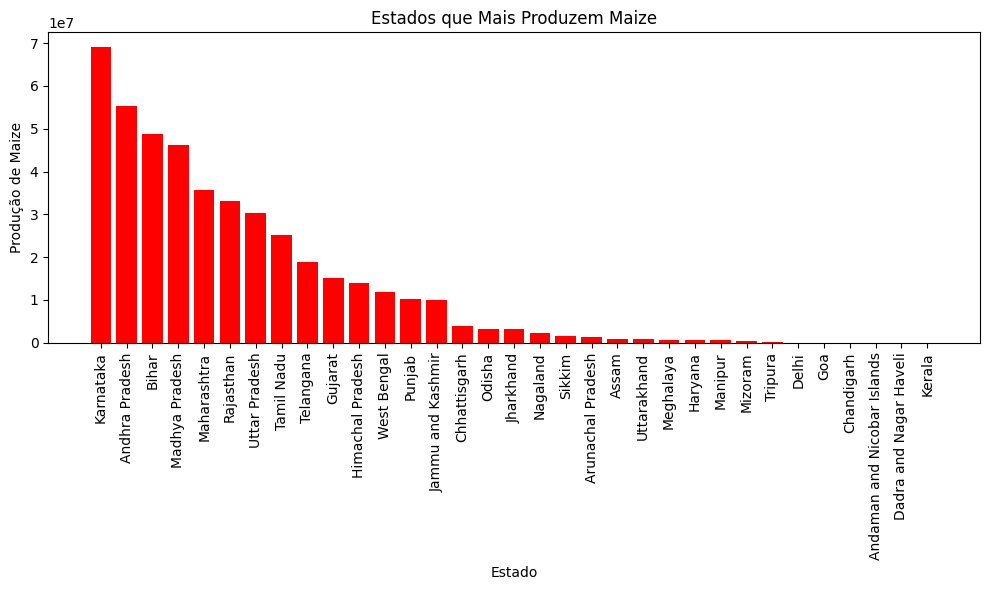

In [75]:
df_arroz = df[df['Crop'] == 'Maize']

producao_por_estado = df_arroz.groupby('State')['Standardized unit'].sum()

estados_mais_produtivos = producao_por_estado.sort_values(ascending=False)

# plot
plt.figure(figsize=(10, 6))
plt.bar(estados_mais_produtivos.index, estados_mais_produtivos.values, color='red')
plt.xlabel('Estado')
plt.ylabel('Produção de Maize')
plt.title('Estados que Mais Produzem Maize')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

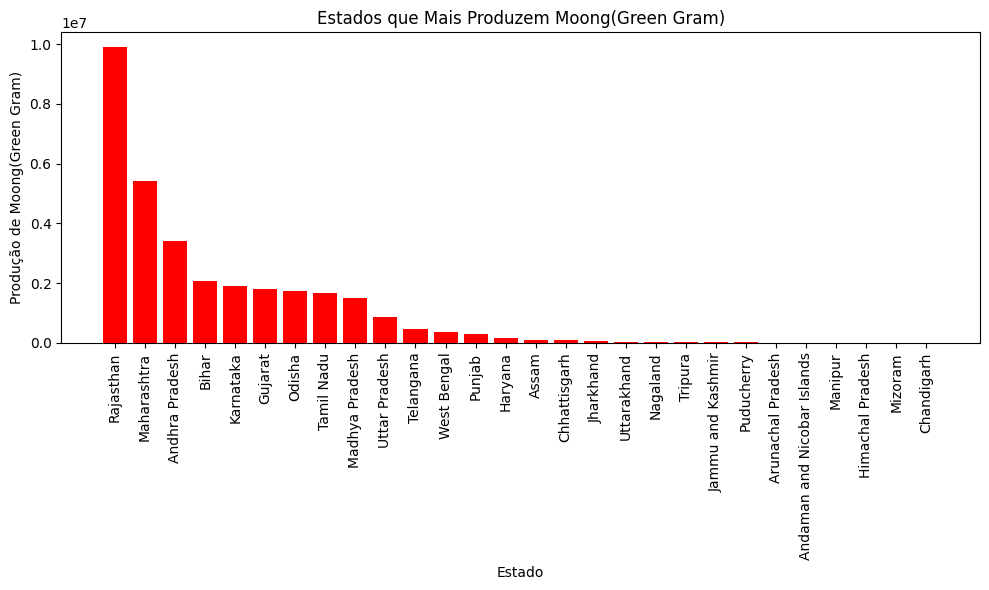

In [76]:
df_arroz = df[df['Crop'] == 'Moong(Green Gram)']

producao_por_estado = df_arroz.groupby('State')['Standardized unit'].sum()

estados_mais_produtivos = producao_por_estado.sort_values(ascending=False)

# plot
plt.figure(figsize=(10, 6))
plt.bar(estados_mais_produtivos.index, estados_mais_produtivos.values, color='red')
plt.xlabel('Estado')
plt.ylabel('Produção de Moong(Green Gram)')
plt.title('Estados que Mais Produzem Moong(Green Gram)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

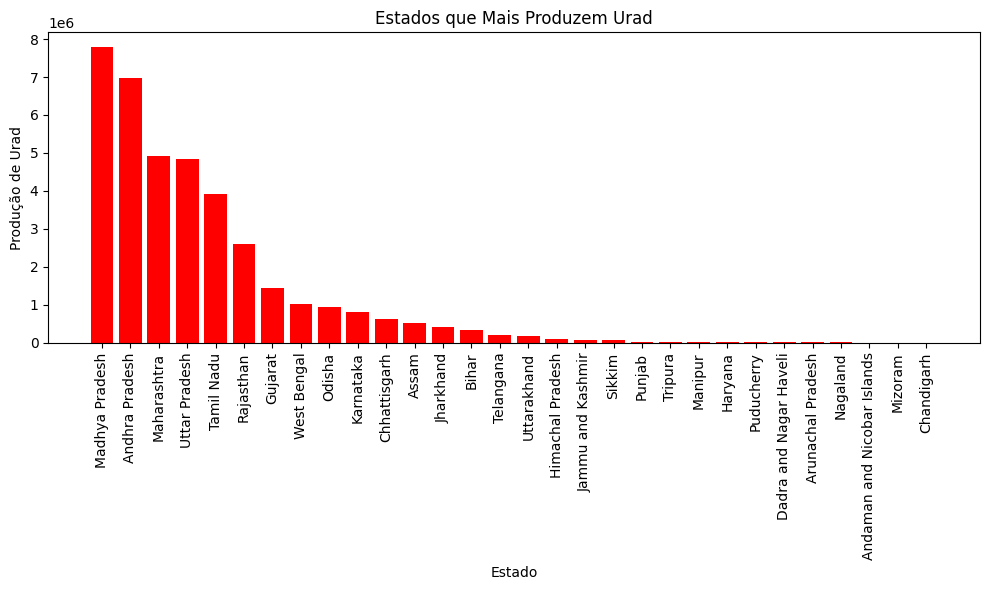

In [77]:
df_arroz = df[df['Crop'] == 'Urad']

producao_por_estado = df_arroz.groupby('State')['Standardized unit'].sum()

estados_mais_produtivos = producao_por_estado.sort_values(ascending=False)

# plot
plt.figure(figsize=(10, 6))
plt.bar(estados_mais_produtivos.index, estados_mais_produtivos.values, color='red')
plt.xlabel('Estado')
plt.ylabel('Produção de Urad')
plt.title('Estados que Mais Produzem Urad')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

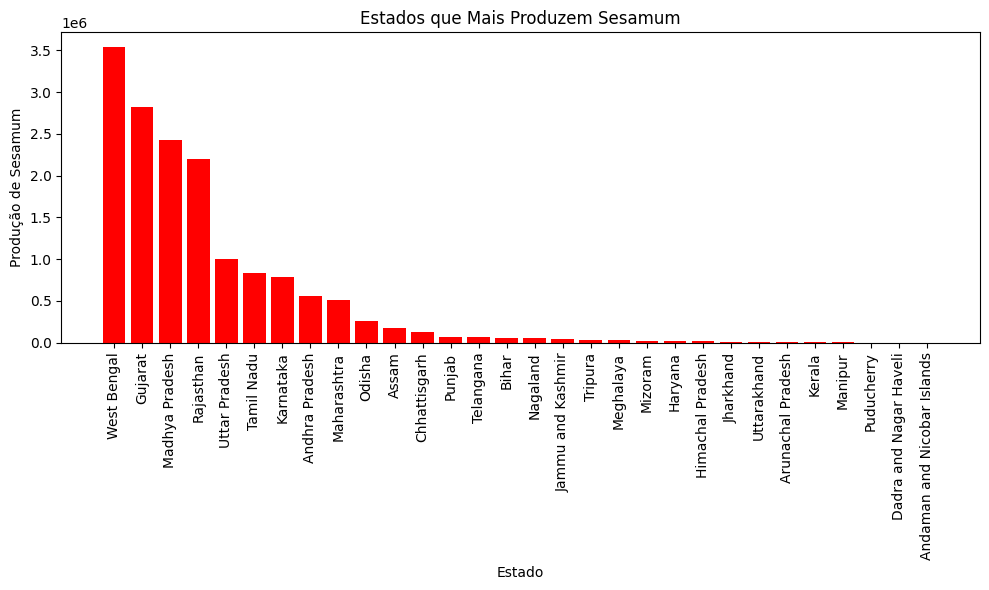

In [78]:
df_arroz = df[df['Crop'] == 'Sesamum']

producao_por_estado = df_arroz.groupby('State')['Standardized unit'].sum()

estados_mais_produtivos = producao_por_estado.sort_values(ascending=False)

# plot
plt.figure(figsize=(10, 6))
plt.bar(estados_mais_produtivos.index, estados_mais_produtivos.values, color='red')
plt.xlabel('Estado')
plt.ylabel('Produção de Sesamum')
plt.title('Estados que Mais Produzem Sesamum')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()